imagine a factory producing coins, each with its own probability p of turning heads </br>
using Metropolis-Hastings, we </br>
1. toss a coin a few times and learn the posterior for its p, with unknown factory p
2. toss more coins and learn the distribution for factory p
3. toss another coin a few times and learn the posterior for its p, now with known factory p

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm

from probability_statistics.sampling.coin_factory import generate_posterior_samples, select_posterior_samples

In [39]:
sns.set_style("whitegrid")

figsize = (16, 6)

In [3]:
n_tosses = 100
n_samples = 25000
burn_in = 5000
lag = 5

### tossing one-coin to learn its p, with unknown factory p

In [47]:
n_heads = 57
data = (100, n_heads)

In [48]:
samples = generate_posterior_samples(data, n_samples)
samples = select_posterior_samples(samples, burn_in, lag)

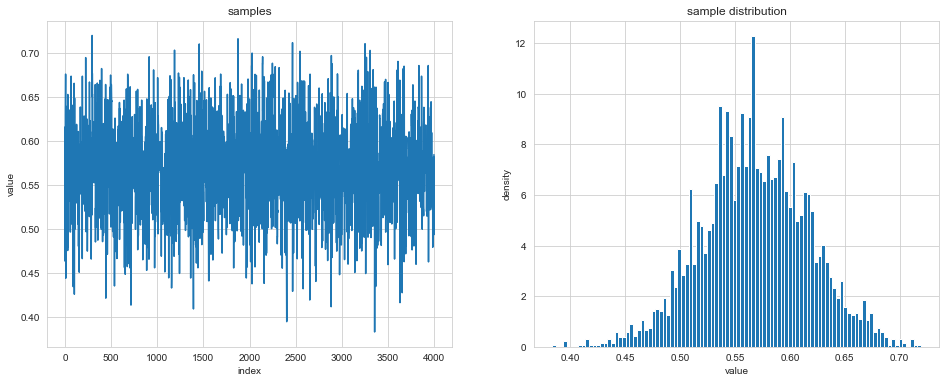

In [50]:
plt.figure(figsize=figsize)
subplot_1 = plt.subplot(121)
subplot_1.plot(samples)
subplot_1.set_title('samples')
subplot_1.set_xlabel('index')
subplot_1.set_ylabel('value')
subplot_2 = plt.subplot(122)
subplot_2.hist(samples, bins=100, density=True)
subplot_2.set_title('sample distribution')
subplot_2.set_xlabel('value')
subplot_2.set_ylabel('density')
plt.show()

In [51]:
# notice how this is close to n_heads
np.mean(samples)

0.5676488286951978

### tossing more coins to learn factory p

In [31]:
n_headss = range(40, 60)
n_coins = 200
means = []
for _ in range(n_coins):
    n_heads = np.random.choice(n_headss)
    data = (n_tosses, n_heads)
    samples = generate_posterior_samples(data, n_samples)
    samples = select_posterior_samples(samples, burn_in, lag)
    mean = np.mean(samples)
    means.append(mean)

/Users/dnguyen/Dinh/probability_statistics/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


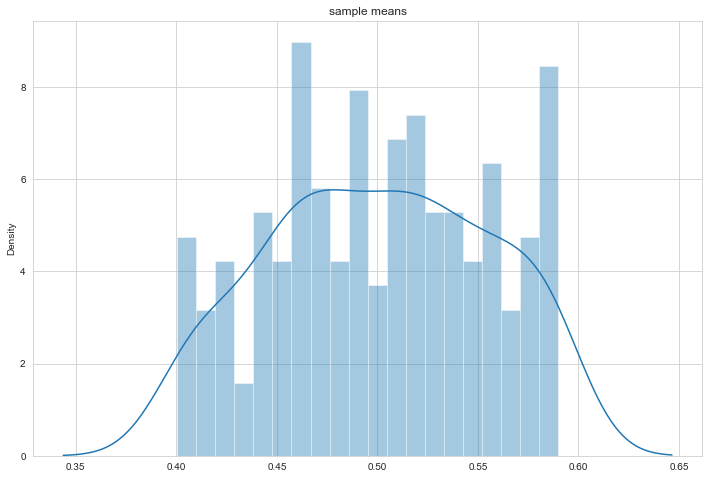

In [32]:
plt.figure(figsize=figsize)
sns.distplot(means, hist=True, kde=True, bins=20)
plt.title('sample means')
plt.show()

In [33]:
mu = np.mean(means)
std = np.std(means)
mu, std

(0.5008945879283823, 0.054408696224440736)

### tossing another-coin to learn its p, now with known factory p

In [41]:
p_dist = norm(mu, std)

n_heads = 65
data = (n_tosses, n_heads)

samples = generate_posterior_samples(data, n_samples, p_dist)
samples = select_posterior_samples(samples, burn_in, lag)

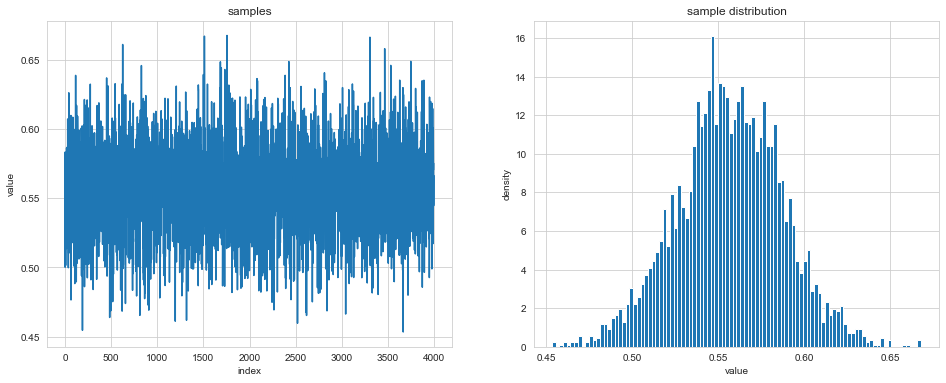

In [42]:
plt.figure(figsize=figsize)
subplot_1 = plt.subplot(121)
subplot_1.plot(samples)
subplot_1.set_title('samples')
subplot_1.set_xlabel('index')
subplot_1.set_ylabel('value')
subplot_2 = plt.subplot(122)
subplot_2.hist(samples, bins=100, density=True)
subplot_2.set_title('sample distribution')
subplot_2.set_xlabel('value')
subplot_2.set_ylabel('density')
plt.show()

In [44]:
# notice how this is not close to n_heads = 65, due to factory p_dist = norm(mu, std)
np.mean(samples)

0.5564374621420093